## Drawing Tools

Often we want to only analyse a specific portion of a picture. This can be done in two ways. One is by cropping the image as shown in notebook 2. The second way is by drawing over the image to highlight only those portions that are required. The second way basically helps retain the original size of the image.

In [1]:
#import libraries
import skimage
import skimage.io as skio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

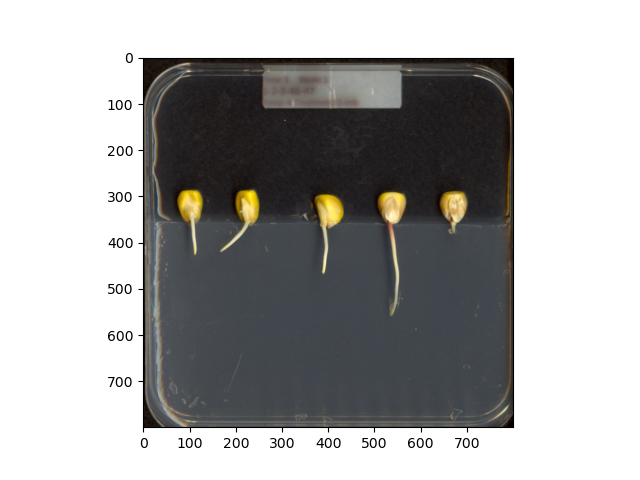

In [2]:
# Create a "MASK" that represents pixel in a image we want to manipulate

image = skio.imread("data/maize-seedlings.tif")
plt.subplots()
plt.imshow(image)

We will create a Mask that tells us that certain pixels are not really required for our analysis and we don't want to consider it in our image. For example in this image, we don't need the black part or the container or even the seeds, so we are going to create a mask for it.

In [3]:
#create a mask
mask = np.ones(shape=image.shape[0:2], dtype="bool")

In [4]:
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

We will use scikit image functions to convert some of these True values to False values.

In [5]:
import skimage.draw

In [6]:
rr, cc = skimage.draw.rectangle(start=(357,44), end=(740, 720))

In [7]:
print(rr)
print(cc)

[[357 358 359 ... 738 739 740]
 [357 358 359 ... 738 739 740]
 [357 358 359 ... 738 739 740]
 ...
 [357 358 359 ... 738 739 740]
 [357 358 359 ... 738 739 740]
 [357 358 359 ... 738 739 740]]
[[ 44  44  44 ...  44  44  44]
 [ 45  45  45 ...  45  45  45]
 [ 46  46  46 ...  46  46  46]
 ...
 [718 718 718 ... 718 718 718]
 [719 719 719 ... 719 719 719]
 [720 720 720 ... 720 720 720]]


sk draw functions gives gigantic lists of coordinates of pixels that are relevant for drawing. They don't really know what they are for. They are just coordinate points.

In [8]:
mask[rr,cc] = False # we are essentialy just drawing a rectangle that is black on a background that is white!

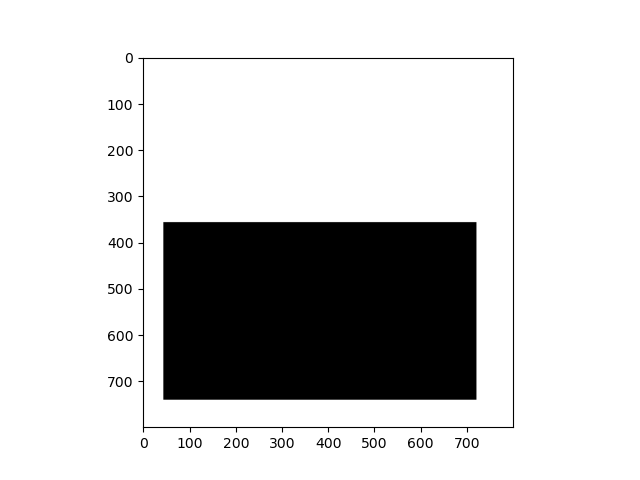

In [9]:
plt.subplots()
plt.imshow(mask, cmap="gray")

In [10]:
image[mask] = [255,0,0]

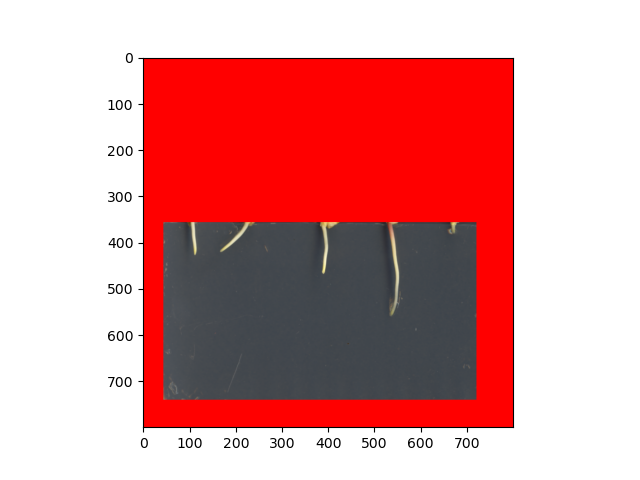

In [11]:
plt.subplots()
plt.imshow(image)

In [12]:
skimage.draw.disk?

Signature: skimage.draw.disk(center, radius, *, shape=None)
Docstring:
Generate coordinates of pixels within circle.

Parameters
----------
center : tuple
    Center coordinate of disk.
radius : double
    Radius of disk.
shape : tuple, optional
    Image shape as a tuple of size 2. Determines the maximum
    extent of output pixel coordinates. This is useful for disks that
    exceed the image size. If None, the full extent of the disk is used.
    The  shape might result in negative coordinates and wraparound
    behaviour.

Returns
-------
rr, cc : ndarray of int
    Pixel coordinates of disk.
    May be used to directly index into an array, e.g.
    ``img[rr, cc] = 1``.

Examples
--------
>>> import numpy as np
>>> from skimage.draw import disk
>>> shape = (4, 4)
>>> img = np.zeros(shape, dtype=np.uint8)
>>> rr, cc = disk((0, 0), 2, shape=shape)
>>> img[rr, cc] = 1
>>> img
array([[1, 1, 0, 0],
       [1, 1, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=uint8)
>>> img = np

In [13]:
image = np.zeros(shape=(600,800,3), dtype="uint8") # represent each of the numbers as bytes

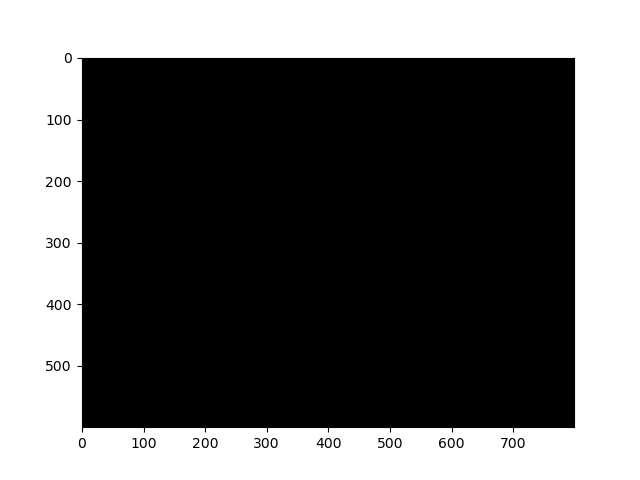

In [14]:
plt.subplots()
plt.imshow(image)

In [15]:
rr, cc = skimage.draw.disk((300,400),50)

In [16]:
image[rr,cc] = 255

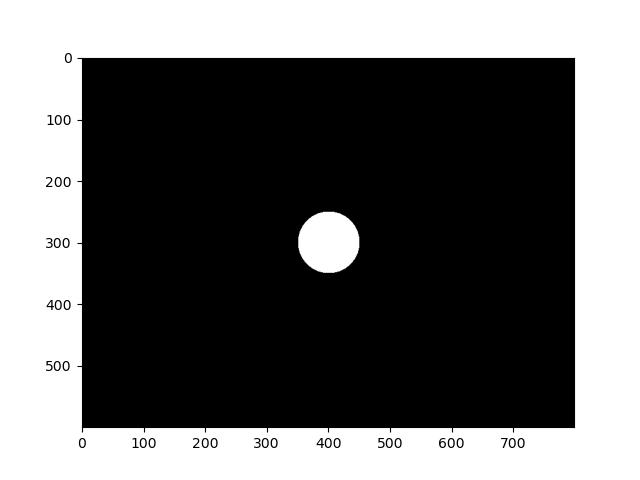

In [17]:
plt.subplots()
plt.imshow(image)

#### Masking a 96 well plate image

We are interested in the colours of the solutions in each of the wells. We do not care about the colour of the rest of the image, i.e., the plastic that makes up the well plate itself. The task is to write some code that will produce a mask that will mask out everything except for the wells. 

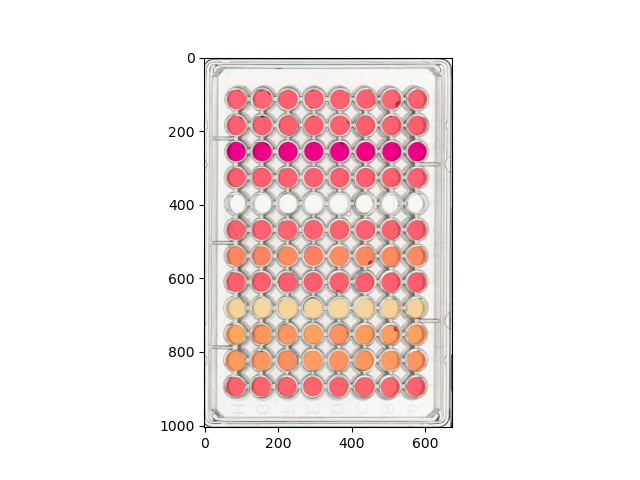

In [18]:
'''
1. Use a loop to load the well centers from the centers.txt file into a list of (y,x) tuples
2. Create a blank B/W mask image which is the same size as the photograph and set the values to white (True)
3. Use a loop to go over each well in the list and draw a circle with the center and the radius. Make the circles black (False)
4. Use the mask to set all of the relevant pixels in the image to black ([0,0,0])
'''
image = skio.imread("data/wellplate-01.jpg")
plt.subplots()
plt.imshow(image)

In [19]:
# read the text file
with open('data/centers.txt', 'r') as file:
    input_lines = [line.strip().split(' ') for line in file]
    

In [20]:
# convert the centers to int and store in a list
center_list = []
for center in input_lines:
    center = list(map(int, center))
    center_list.append(center)

In [21]:
center_list

[[91, 108],
 [161, 108],
 [231, 108],
 [301, 108],
 [371, 108],
 [441, 108],
 [511, 108],
 [581, 108],
 [91, 180],
 [161, 180],
 [231, 180],
 [301, 180],
 [371, 180],
 [441, 180],
 [511, 180],
 [581, 180],
 [91, 252],
 [161, 252],
 [231, 252],
 [301, 252],
 [371, 252],
 [441, 252],
 [511, 252],
 [581, 252],
 [91, 324],
 [161, 324],
 [231, 324],
 [301, 324],
 [371, 324],
 [441, 324],
 [511, 324],
 [581, 324],
 [91, 396],
 [161, 396],
 [231, 396],
 [301, 396],
 [371, 396],
 [441, 396],
 [511, 396],
 [581, 396],
 [91, 468],
 [161, 468],
 [231, 468],
 [301, 468],
 [371, 468],
 [441, 468],
 [511, 468],
 [581, 468],
 [91, 540],
 [161, 540],
 [231, 540],
 [301, 540],
 [371, 540],
 [441, 540],
 [511, 540],
 [581, 540],
 [91, 612],
 [161, 612],
 [231, 612],
 [301, 612],
 [371, 612],
 [441, 612],
 [511, 612],
 [581, 612],
 [91, 684],
 [161, 684],
 [231, 684],
 [301, 684],
 [371, 684],
 [441, 684],
 [511, 684],
 [581, 684],
 [91, 756],
 [161, 756],
 [231, 756],
 [301, 756],
 [371, 756],
 [441, 75

In [22]:
#create a mask
mask = np.ones(shape=image.shape[0:2], dtype="bool")

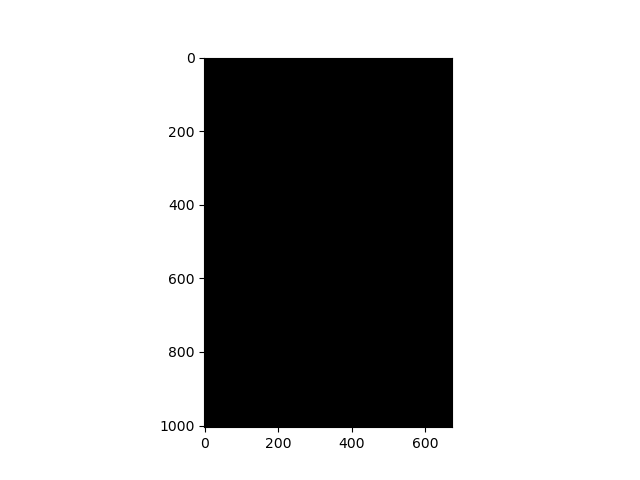

In [23]:
# plot the mask
plt.subplots()
plt.imshow(mask, cmap="gray")

In [24]:
# Draw a circle on the mask for each well
for i in center_list:
    y = i[1]
    x = i[0]
    rr, cc = skimage.draw.disk((y,x), 16)
    mask[rr,cc] = False

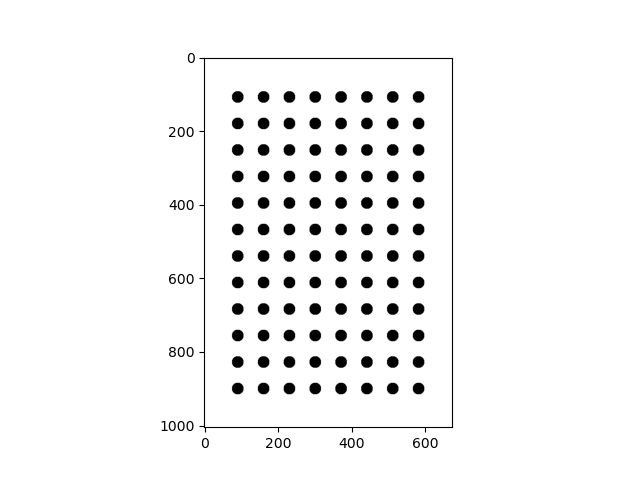

In [25]:
# Plot the circles on the mask
plt.subplots()
plt.imshow(mask, cmap = "gray")

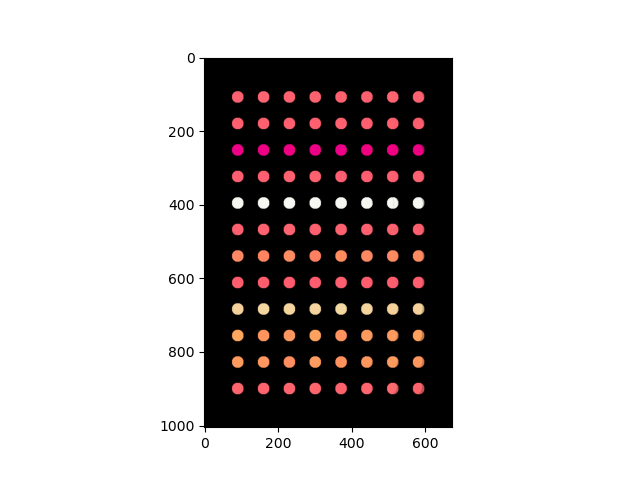

In [27]:
# Plot the image with the mask set to all relevant pixels
image[mask] = 0
plt.subplots()
plt.imshow(image, cmap = "gray")